## **뮤직 비디오 트렌드 분석 in YouTube**
- **Keyword: music vedio, mv** 
- **기간: 5년**

### **Pytrends(Google Trends용 API)**

In [1]:
from pytrends.request import TrendReq

In [2]:
import pandas as pd
import seaborn as sns
import folium

In [4]:
import platform
import matplotlib.pyplot as plt

%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...')    

plt.rcParams['axes.unicode_minus'] = False

### **MV top 100**

In [6]:
pytrends = TrendReq(hl='en-US', tz=360)
kw_list = ['music video', 'mv']
pytrends.build_payload(kw_list, cat=0, timeframe='today 5-y', geo='', gprop='youtube')

In [7]:
df_queries = pytrends.related_queries()

In [8]:
top_music_video = df_queries.get('music video').get('top') # top : Google Trends 점수(0~100) -> 가장 인기 있는 검색어
top_mv = df_queries.get('mv').get('top')
df_top = pd.concat([top_music_video, top_mv])
df_top.sort_values(['value'], ascending = False).head().reset_index(drop = True)

,query,value
0,official music video,100
1,mv bts,100
2,bts,96
3,music song,74
4,blackpink mv,30


In [9]:
rising_music_video = df_queries.get('music video').get('rising') # rising : 검색 빈도가 가장 많이 증가한 검색어
rising_mv = df_queries.get('mv').get('rising')
df_rising = pd.concat([rising_music_video, rising_mv])
df_rising.sort_values(['value'], ascending = False).head(5).reset_index(drop = True)

,query,value
0,blackpink mv,485150
1,blackpink,464650
2,gacha music video,220900
3,gacha life music video,196450
4,bts dynamite,176250


**의외로 블랙핑크가 높네,, 얘들 변화 추이 확인**  
- Interest Over Time  
- 'BTS', 'Dynamite', 'Blackpink', 'Gacha'

In [10]:
kw_list = ['BTS', 'Dynamite', 'Blackpink', 'Gacha']
pytrends.build_payload(kw_list, cat=0, timeframe='today 5-y', geo='', gprop='youtube')
df_interest = pytrends.interest_over_time().drop(columns='isPartial')

Text(0.5, 1.0, 'Music Video Trends Over Time')

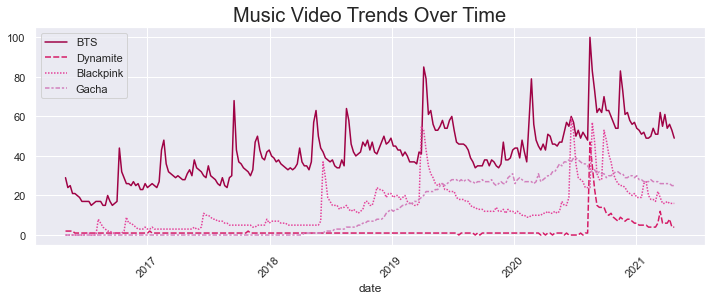

In [14]:
plt.figure(figsize=(12,4))
plt.xticks(rotation=45)
sns.set(style='darkgrid', palette='PuRd_r')
ax = sns.lineplot(data=df_interest)
ax.set_title('Music Video Trends Over Time', fontsize=20)

### **BTS로 국가별 관심 확인**

In [17]:
kw_list = ['BTS']
pytrends.build_payload(kw_list, cat=0, timeframe='today 5-y', geo='', gprop='youtube')
df_interest_region = pytrends.interest_by_region(resolution='COUNTRY', inc_low_vol=False)
df = df_interest_region.sort_values(by='BTS', ascending=False).head(10).reset_index()

In [18]:
df_interest_region

,BTS
geoName,
Afghanistan,0
Albania,0
Algeria,19
American Samoa,0
Andorra,0
...,...
Western Sahara,0
Yemen,0
Zambia,0


In [19]:
df

,geoName,BTS
0,Philippines,100
1,Myanmar (Burma),93
2,Malaysia,90
3,Mongolia,89
4,Singapore,76
5,Indonesia,69
6,Japan,56
7,Peru,49
8,Taiwan,49
9,Vietnam,47


### **10개국 차트로 시각화**

Text(0, 0.5, 'Value')

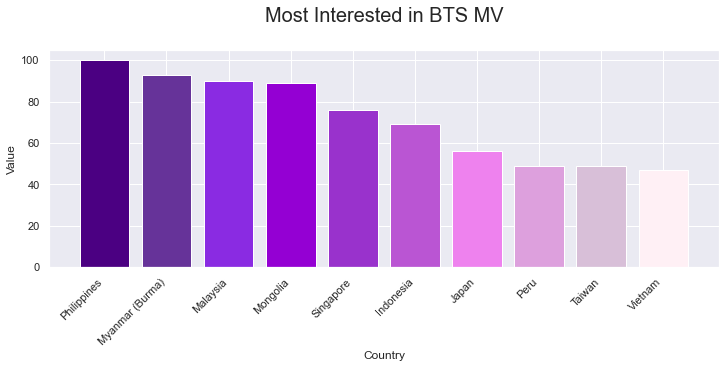

In [24]:
fig = plt.figure(figsize=(12,4))
# colors = sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True)
plt.bar(df['geoName'], df['BTS'], color=['indigo', 'rebeccapurple', 'blueviolet', 'darkviolet', 'darkorchid', 'mediumorchid', 'violet', 'plum', 'thistle', 'lavenderblush'])
plt.xticks(rotation=45, ha='right')
plt.title('Most Interested in BTS MV',y=1.1, fontsize=20)
plt.xlabel('Country')
plt.ylabel('Value')

### **관심도 우리나라 지도에 표기**
**의미가 있나...?**

In [26]:
df_bts = df_interest_region.sort_values(by='BTS', ascending=False).head(250).reset_index()

In [33]:
df_bts

,geoName,BTS
0,Philippines,100
1,Myanmar (Burma),93
2,Malaysia,90
3,Mongolia,89
4,Singapore,76
...,...,...
245,Iran,0
246,Isle of Man,0
247,Jamaica,0
248,Jersey,0


In [29]:
import json
geo_path = '07. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

In [32]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='cartodbpositron')
map.choropleth(geo_data=geo_str, name='choropleth',  
                   data=df_bts, columns=['geoName', 'BTS'],  
                   key_on='properties.name', fill_color='PuRd')
map